# LTFS Top-up loan Up-sell prediction

A **loan** is when you **receive the money from a financial institution in exchange for future repayment of the principal, plus interest**. Financial institutions provide loans to the industries, corporates and individuals. The interest received on these loans is one among the main sources of income for the financial institutions.

A **top-up loan**, true to its name, is **a facility of availing further funds on an existing loan**. When you have a loan that has already been disbursed and under repayment and if you need more funds then, you can simply avail additional funding on the same loan thereby minimizing time, effort and cost related to applying again.

LTFS provides it’s loan services to its customers and is interested in selling more of its Top-up loan services to its existing customers so they have decided **to identify when to pitch a Top-up during the original loan tenure**.  If they correctly **identify the most suitable time to offer a top-up**, this will ultimately lead to more disbursals and can also help them beat competing offerings from other institutions.


To understand this behaviour, LTFS has provided data for its customers containing the information whether that particular customer took the Top-up service and when he took such Top-up service, represented by the target variable Top-up Month.



You are provided with two types of information: 



  > 1. **Customer’s Demographics :** The demography table along with the target variable & demographic information contains variables related to Frequency of the loan, Tenure of the loan, Disbursal Amount for a loan & LTV.


  > 2. **Bureau data :**  Bureau data contains the behavioural and transactional attributes of the customers like current balance, Loan Amount, Overdue etc. for various tradelines of a given customer

As a data scientist, LTFS  has tasked you with building a model given the Top-up loan bucket of 128655 customers along with demographic and bureau data, predict the right bucket/period for 14745 customers in the test data.

Important Note

**Note -** feasibility of implementation of top solutions in real production scenario will be considered while adjudging winners and can change the final standing for Prize Eligibility

### Evaluation
The evaluation metric is **macro_f1_score across** all entries in the test set.


## Installing & Loading Required Libraries & Packages

#### 1.1. - Installing Required Libraries


In [2]:
pip install pandas

  Using cached pytz-2021.1-py2.py3-none-any.whl (510 kB)
  Using cached numpy-1.20.1-cp37-cp37m-win_amd64.whl (13.6 MB)Note: you may need to restart the kernel to use updated packages.



In [3]:
pip install numpy

In [4]:
pip install scipy

  Using cached scipy-1.6.1-cp37-cp37m-win_amd64.whl (32.6 MB)



In [5]:
pip install matplotlib

  Using cached kiwisolver-1.3.1-cp37-cp37m-win_amd64.whl (51 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)



In [6]:
pip install seaborn

In [7]:
pip install plotly

  Using cached plotly-4.14.3-py2.py3-none-any.whl (13.2 MB)
  Using cached retrying-1.3.3.tar.gz (10 kB)
Note: you may need to restart the kernel to use updated packages.  Building wheel for retrying (setup.py): finished with status 'done'
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=51c190fa630183f3cfd00bedc824684a0d96c3299308ef58fa3e3a20f186c005
  Stored in directory: c:\users\sharmila_biyani\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying



In [8]:
pip install scikit-learn

  Using cached scikit_learn-0.24.1-cp37-cp37m-win_amd64.whl (6.8 MB)
  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)



In [9]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install openpyxl


  Created wheel for et-xmlfile: filename=et_xmlfile-1.0.1-py3-none-any.whl size=8913 sha256=fe1860b00daed1b1f0c4dcf637783dcf92b7a6485e295166e104932ac216ffff
  Stored in directory: c:\users\sharmila_biyani\appdata\local\pip\cache\wheels\e2\bd\55\048b4fd505716c4c298f42ee02dffd9496bb6d212b266c7f31
Successfully built et-xmlfile


#### 1.2.  Loading Required Packages

In [3]:
import os
import sys
import math
import statistics
import warnings
warnings.filterwarnings('ignore')

import pandas as pd # Data Manipulation & Processing
import numpy as np # Array Manipulation
from scipy.stats import describe, kurtosis, skew

# For Data Visualization purpose
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline



#### Load Dataset

In [11]:
# Customer Demographic Dataset

train_demo = pd.read_csv("train_data.csv")
test_demo = pd.read_csv("test_data.csv")

In [12]:
# New Bureau Features Dataset - Regarding customer Bureau history

train_feat = pd.read_csv("train_new_features_from_bureau.csv")
test_feat = pd.read_csv("test_new_features_from_bureau.csv")


In [14]:
# Mearging Bureau Features Datasets with Demographic Datasets on the basis of "ID"
new_train = pd.merge(train_demo, train_feat, how = 'inner', on = 'ID')
new_test = pd.merge(test_demo, test_feat, how = 'outer', on = 'ID')

In [17]:
# Creating "CSV" files merged train and test series.
new_train.to_csv("new_train.csv", sep = ',', index = False) # new train = train_demo + train_feat
new_test.to_csv("new_test.csv", sep = ',', index = False) # new train = train_demo + train_feat

## 2. Exploratory Data Analysis / Data Preparing

#### a. Analyze Data

##### Checking Shape

In [19]:
# ## Checking Original Datasets Shape
print(f">>> Original Train-Customer Demographic dataset consist {train_demo.shape[0]} records and {train_demo.shape[1]} attributes.")
print(f">>> Original Test-Customer Demographic dataset consist {test_demo.shape[0]} records and {test_demo.shape[1]} attributes.\n\n")

# ## Checking New Datasets shape after mearging bureau features
print(f">>> Train-Customer Demographic + Bureau Features dataset consist {new_train.shape[0]} records and {new_train.shape[1]} attributes.")
print(f">>> Test-Customer Demographic + Bureau Features dataset consist {new_test.shape[0]} records and {new_test.shape[1]} attributes.")


>>> Original Train-Customer Demographic dataset consist 128655 records and 26 attributes.
>>> Original Test-Customer Demographic dataset consist 14745 records and 25 attributes.


>>> Train-Customer Demographic + Bureau Features dataset consist 128655 records and 37 attributes.
>>> Test-Customer Demographic + Bureau Features dataset consist 14745 records and 36 attributes.


##### Checking Heads & Tails of train set

In [20]:
new_train.head()

ID Frequency InstlmentMode LoanStatus   PaymentMode  BranchID      Area  \
0   1   Monthly        Arrear     Closed         PDC_E         1       NaN   
1   2   Monthly       Advance     Closed           PDC       333    BHOPAL   
2   3   Quatrly        Arrear     Active  Direct Debit         1       NaN   
3   7   Monthly       Advance     Closed        Billed       125      GUNA   
4   8   Monthly        Arrear     Closed        Billed       152  BILASPUR   

   Tenure  AssetCost  AmountFinance  ...  BUREAU_LOAN_TYPE  AVERAGE_LOAN_TYPE  \
0      48     450000       275000.0  ...                 4           2.250000   
1      47     485000       350000.0  ...                 7           1.857143   
2      68     690000       519728.0  ...                 8           3.875000   
3      48     480000       400000.0  ...                 2           2.000000   
4      44     619265       440000.0  ...                 3           2.333333   

  ACCT_ACTIVE ACCT_CLOSED ACCT_DELINQUENT  ACCT_SETTLED AND RESTRUCTURED  \
0           2           2               2                              1   
1           2           2               1                              1   
2           2           2               2                              1   
3           2           2               1                              1   
4           2           2               2                              1   

   ACCT_SUIT FILLED (WILFUL_DEFAULTER)  ACCT_WRITTEN_OFF  CURRENT_LOAN_BAL  \
0                                    1                 1          643176.0   
1                                    1                 1        10349457.0   
2                                    1                 1         2335165.0   
3                                    1                 1          624000.0   
4                                    2                 1          974119.0   

  ACTIVE_LOAN_TENURE  
0              120.0  
1              565.0  
2              454.0  
3               33.0  
4              236.0  

[5 rows x 37 columns]

In [21]:
new_train.tail()

ID    Frequency InstlmentMode LoanStatus   PaymentMode  BranchID  \
128650  143390  Half Yearly        Arrear     Closed  Direct Debit       424   
128651  143391  Half Yearly        Arrear     Closed  Direct Debit       424   
128652  143393      Monthly        Arrear     Active  Direct Debit       424   
128653  143394  Half Yearly        Arrear     Active  Direct Debit       424   
128654  143395  Half Yearly        Arrear     Active  Direct Debit       424   

           Area  Tenure  AssetCost  AmountFinance  ...  BUREAU_LOAN_TYPE  \
128650  PANIPAT      24     470000       265601.0  ...                 2   
128651  PANIPAT      24     460000       275630.0  ...                 1   
128652  PANIPAT      23     545000       300733.0  ...                 2   
128653  PANIPAT      35     350000       250962.0  ...                 1   
128654  PANIPAT      24     370000       200428.0  ...                 1   

        AVERAGE_LOAN_TYPE ACCT_ACTIVE ACCT_CLOSED ACCT_DELINQUENT  \
128650                1.0           1           1               1   
128651                1.0           1           1               1   
128652                2.0           2           2               1   
128653                1.0           1           1               1   
128654                1.0           1           1               1   

        ACCT_SETTLED AND RESTRUCTURED  ACCT_SUIT FILLED (WILFUL_DEFAULTER)  \
128650                              1                                    1   
128651                              1                                    1   
128652                              1                                    1   
128653                              1                                    1   
128654                              1                                    1   

        ACCT_WRITTEN_OFF  CURRENT_LOAN_BAL ACTIVE_LOAN_TENURE  
128650                 1         1867630.0              121.0  
128651                 1           73890.0                0.0  
128652                 1          244133.0               84.0  
128653                 1          132487.0                0.0  
128654                 1          105499.0                0.0  

[5 rows x 37 columns]

In [17]:
test_demo.head()

ID    Frequency InstlmentMode LoanStatus PaymentMode  BranchID     Area  \
0    4      Monthly       Advance     Closed       PDC_E         2     GUNA   
1    5      Monthly       Advance     Closed         PDC         2     GUNA   
2    6      Quatrly        Arrear     Closed         PDC         2     GUNA   
3   25  Half Yearly        Arrear     Closed      Billed       154      NaN   
4  119      Quatrly        Arrear     Closed         PDC       194  CUTTACK   

   Tenure  AssetCost  AmountFinance  ...   AssetID  ManufacturerID SupplierID  \
0      46     480000       365000.0  ...   3524747          1046.0      22354   
1      45     480000       285000.0  ...   4985862          1046.0      22354   
2      48     580000       400000.0  ...  12881783          1060.0      65929   
3      36     725000       500000.0  ...  10613776          1049.0      68597   
4      48     617000       400000.0  ...   7911110          1049.0      38493   

     LTV SEX   AGE  MonthlyIncome            City           State   ZiPCODE  
0  75.83   M  50.0       32069.00            GUNA  MADHYA PRADESH  473001.0  
1  57.44   M  35.0       25000.00            GUNA  MADHYA PRADESH  473001.0  
2  68.97   M  37.0       23333.33            GUNA  MADHYA PRADESH  473001.0  
3  61.79   M  55.0       91666.67      MAHASAMUND     CHATTISGARH  493558.0  
4  59.09   M  48.0       12500.00  JAGATSINGHAPUR          ORISSA  754137.0  

[5 rows x 25 columns]

##### Checking information of Train data

In [22]:
print(">>> new_Train-Demographic + Bureau Features info as - ")
print("-"*50, '\n')
print(new_train.info())

>>> new_Train-Demographic + Bureau Features info as - 
-------------------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128655 entries, 0 to 128654
Data columns (total 37 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ID                                   128655 non-null  int64  
 1   Frequency                            128655 non-null  object 
 2   InstlmentMode                        128655 non-null  object 
 3   LoanStatus                           128655 non-null  object 
 4   PaymentMode                          128655 non-null  object 
 5   BranchID                             128655 non-null  int64  
 6   Area                                 117002 non-null  object 
 7   Tenure                               128655 non-null  int64  
 8   AssetCost                            128655 non-null  int64  
 9   AmountFinance                        12

The Train-customer demographic data consist as -
   > 1. datetime data types - 3
   > 2. float data types - 7
   > 3. integer data types - 7
   > 4. object / character data types - 9

##### Identifing Unique values for all columns

In [23]:
new_train.nunique()

ID                                     128655
Frequency                                   4
InstlmentMode                               2
LoanStatus                                  2
PaymentMode                                11
BranchID                                  189
Area                                       92
Tenure                                    141
AssetCost                                7835
AmountFinance                           20439
DisbursalAmount                         19412
EMI                                     24323
DisbursalDate                            2837
MaturityDAte                              980
AuthDate                                 2711
AssetID                                128655
ManufacturerID                             10
SupplierID                               4539
LTV                                      7988
SEX                                         2
AGE                                        73
MonthlyIncome                     

#### Checking Missing / Null values

In [24]:
missing_value_count = new_train.isnull().sum()
missing_value_count

ID                                         0
Frequency                                  0
InstlmentMode                              0
LoanStatus                                 0
PaymentMode                                0
BranchID                                   0
Area                                   11653
Tenure                                     0
AssetCost                                  0
AmountFinance                              0
DisbursalAmount                            0
EMI                                        0
DisbursalDate                              0
MaturityDAte                               1
AuthDate                                   0
AssetID                                    0
ManufacturerID                             0
SupplierID                                 0
LTV                                        0
SEX                                       59
AGE                                       59
MonthlyIncome                            234
City      

In [26]:
new_train.columns[new_train.isnull().any()]

Index(['Area', 'MaturityDAte', 'SEX', 'AGE', 'MonthlyIncome', 'City',
       'ZiPCODE'],
      dtype='object')

In [27]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(new_train)

Your selected dataframe has 37 columns and 128655 Rows.
There are 7 columns that have missing values.


Zero Values  Missing Values  % of Total Values  \
Area                     0           11653                9.1   
City                     0           11256                8.7   
ZiPCODE                  0             372                0.3   
MonthlyIncome           27             234                0.2   
SEX                      0              59                0.0   
AGE                      0              59                0.0   
MaturityDAte             0               1                0.0   

               Total Zero Missing Values  % Total Zero Missing Values  \
Area                               11653                          9.1   
City                               11256                          8.7   
ZiPCODE                              372                          0.3   
MonthlyIncome                        261                          0.2   
SEX                                   59                          0.0   
AGE                                   59                          0.0   
MaturityDAte                           1                          0.0   

              Data Type  
Area             object  
City             object  
ZiPCODE         float64  
MonthlyIncome   float64  
SEX              object  
AGE             float64  
MaturityDAte     object

In [25]:
# how many total missing values do we have?
total_cells = np.product(new_train.shape)
total_missing = missing_value_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.4964880935500033


#### Checking Duplicates

In [28]:
new_train.duplicated(keep = 'first').sum()

0

#### Descriptive Statistics

In [31]:
new_train.describe(include=np.number).T

count          mean           std  \
ID                                   128655.0  7.096533e+04  4.176278e+04   
BranchID                             128655.0  1.662897e+02  1.158440e+02   
Tenure                               128655.0  4.246478e+01  2.353397e+01   
AssetCost                            128655.0  5.550247e+05  1.083036e+05   
AmountFinance                        128655.0  3.483096e+05  1.055453e+05   
DisbursalAmount                      128655.0  3.479306e+05  1.053198e+05   
EMI                                  128655.0  5.507276e+04  2.891011e+04   
AssetID                              128655.0  1.639773e+07  9.539540e+06   
ManufacturerID                       128655.0  1.171327e+03  2.577902e+02   
SupplierID                           128655.0  5.655123e+04  3.639936e+04   
LTV                                  128655.0  5.912623e+01  1.553904e+01   
AGE                                  128596.0  4.066480e+01  1.171285e+01   
MonthlyIncome                        128421.0  5.032360e+04  1.724607e+06   
ZiPCODE                              128283.0  4.279311e+05  1.757044e+05   
LOAN_COUNT                           128655.0  4.359286e+00  5.633960e+00   
BUREAU_LOAN_TYPE                     128655.0  2.287047e+00  1.590179e+00   
AVERAGE_LOAN_TYPE                    128655.0  1.643956e+00  1.094278e+00   
ACCT_ACTIVE                          128655.0  1.482235e+00  4.996863e-01   
ACCT_CLOSED                          128655.0  1.497882e+00  4.999975e-01   
ACCT_DELINQUENT                      128655.0  1.175337e+00  3.802567e-01   
ACCT_SETTLED AND RESTRUCTURED        128655.0  1.007749e+00  8.768930e-02   
ACCT_SUIT FILLED (WILFUL_DEFAULTER)  128655.0  1.013237e+00  1.142884e-01   
ACCT_WRITTEN_OFF                     128655.0  1.013991e+00  1.174533e-01   
CURRENT_LOAN_BAL                     128655.0  4.225824e+05  2.635774e+06   
ACTIVE_LOAN_TENURE                   128655.0  4.314659e+01  1.030477e+02   

                                             min         25%          50%  \
ID                                          1.00    34408.50     70988.00   
BranchID                                    1.00       50.00       152.00   
Tenure                                      5.00       36.00        36.00   
AssetCost                              200000.00   500000.00    550735.00   
AmountFinance                           50000.00   290000.00    350000.00   
DisbursalAmount                          2894.00   290000.00    350000.00   
EMI                                         0.00    32500.00     59700.00   
AssetID                                422271.00  9438948.50  15133927.00   
ManufacturerID                           1019.00     1046.00      1062.00   
SupplierID                               5879.00    24093.00     39146.00   
LTV                                        -1.38       49.14        60.78   
AGE                                        18.00       31.00        40.00   
MonthlyIncome                               0.00    25000.00     35833.33   
ZiPCODE                                110000.00   304804.00    458553.00   
LOAN_COUNT                                  1.00        1.00         2.00   
BUREAU_LOAN_TYPE                            1.00        1.00         2.00   
AVERAGE_LOAN_TYPE                           1.00        1.00         1.00   
ACCT_ACTIVE                                 1.00        1.00         1.00   
ACCT_CLOSED                                 1.00        1.00         1.00   
ACCT_DELINQUENT                             1.00        1.00         1.00   
ACCT_SETTLED AND RESTRUCTURED               1.00        1.00         1.00   
ACCT_SUIT FILLED (WILFUL_DEFAULTER)         1.00        1.00         1.00   
ACCT_WRITTEN_OFF                            1.00        1.00         1.00   
CURRENT_LOAN_BAL                    -20865834.00        0.00    137285.00   
ACTIVE_LOAN_TENURE                          0.00        0.00         0.00   

                                  

In [32]:
new_train.describe(include='O').T

count unique                  top    freq
Frequency      128655      4          Half Yearly   76248
InstlmentMode  128655      2               Arrear  122349
LoanStatus     128655      2               Closed   94457
PaymentMode    128655     11         Direct Debit   31766
Area           117002     92              LUCKNOW    9337
DisbursalDate  128655   2837  2017-10-31 00:00:00    1287
MaturityDAte   128654    980  2018-06-10 00:00:00    2298
AuthDate       128655   2711  2017-10-31 00:00:00    1295
SEX            128596      2                    M  122144
City           117399    488             NALGONDA    2231
State          128655     22       MADHYA PRADESH   19122
Top-up Month   128655      7    No Top-up Service  106677

In [ ]:
nomial_col = ['Frequency', 'InstlmentMode', 'LoanStatus', 'PaymentMode', 'SEX']

In [33]:
# ## Separating Target Variable and Individual Variables

ind_var = new_train.drop('Top-up Month', axis = 1)
target_var = new_train['Top-up Month'] 

In [34]:
ind_var

ID    Frequency InstlmentMode LoanStatus   PaymentMode  BranchID  \
0            1      Monthly        Arrear     Closed         PDC_E         1   
1            2      Monthly       Advance     Closed           PDC       333   
2            3      Quatrly        Arrear     Active  Direct Debit         1   
3            7      Monthly       Advance     Closed        Billed       125   
4            8      Monthly        Arrear     Closed        Billed       152   
...        ...          ...           ...        ...           ...       ...   
128650  143390  Half Yearly        Arrear     Closed  Direct Debit       424   
128651  143391  Half Yearly        Arrear     Closed  Direct Debit       424   
128652  143393      Monthly        Arrear     Active  Direct Debit       424   
128653  143394  Half Yearly        Arrear     Active  Direct Debit       424   
128654  143395  Half Yearly        Arrear     Active  Direct Debit       424   

            Area  Tenure  AssetCost  AmountFinance  ...  BUREAU_LOAN_TYPE  \
0            NaN      48     450000       275000.0  ...                 4   
1         BHOPAL      47     485000       350000.0  ...                 7   
2            NaN      68     690000       519728.0  ...                 8   
3           GUNA      48     480000       400000.0  ...                 2   
4       BILASPUR      44     619265       440000.0  ...                 3   
...          ...     ...        ...            ...  ...               ...   
128650   PANIPAT      24     470000       265601.0  ...                 2   
128651   PANIPAT      24     460000       275630.0  ...                 1   
128652   PANIPAT      23     545000       300733.0  ...                 2   
128653   PANIPAT      35     350000       250962.0  ...                 1   
128654   PANIPAT      24     370000       200428.0  ...                 1   

        AVERAGE_LOAN_TYPE ACCT_ACTIVE ACCT_CLOSED ACCT_DELINQUENT  \
0                2.250000           2           2               2   
1                1.857143           2           2               1   
2                3.875000           2           2               2   
3                2.000000           2           2               1   
4                2.333333           2           2               2   
...                   ...         ...         ...             ...   
128650           1.000000           1           1               1   
128651           1.000000           1           1               1   
128652           2.000000           2           2               1   
128653           1.000000           1           1               1   
128654           1.000000           1           1               1   

        ACCT_SETTLED AND RESTRUCTURED  ACCT_SUIT FILLED (WILFUL_DEFAULTER)  \
0                                   1                                    1   
1                                   1                                    1   
2                                   1                                    1   
3                                   1                                    1   
4                                   1                                    2   
...                               ...                                  ...   
128650                              1                                    1   
128651                              1                                    1   
128652                              1                                    1   
128653                              1                                    1   
128654                              1                                    1   

        ACCT_WRITTEN_OFF  CURRENT_LOAN_BAL ACTIVE_LOAN_TENURE  
0                      1          643176.0              120.0  
1                      1        10349457.0              565.0  
2                      1         2335165.0              454.0  
3                      1          624000.0               33.0  
4                      1          974119

In [36]:
target_var.value_counts()

No Top-up Service    106677
 > 48 Months           8366
36-48 Months           3656
24-30 Months           3492
30-36 Months           3062
18-24 Months           2368
12-18 Months           1034
Name: Top-up Month, dtype: int64

#### b. Data Visualization - I (Customer Demographic Dataset)

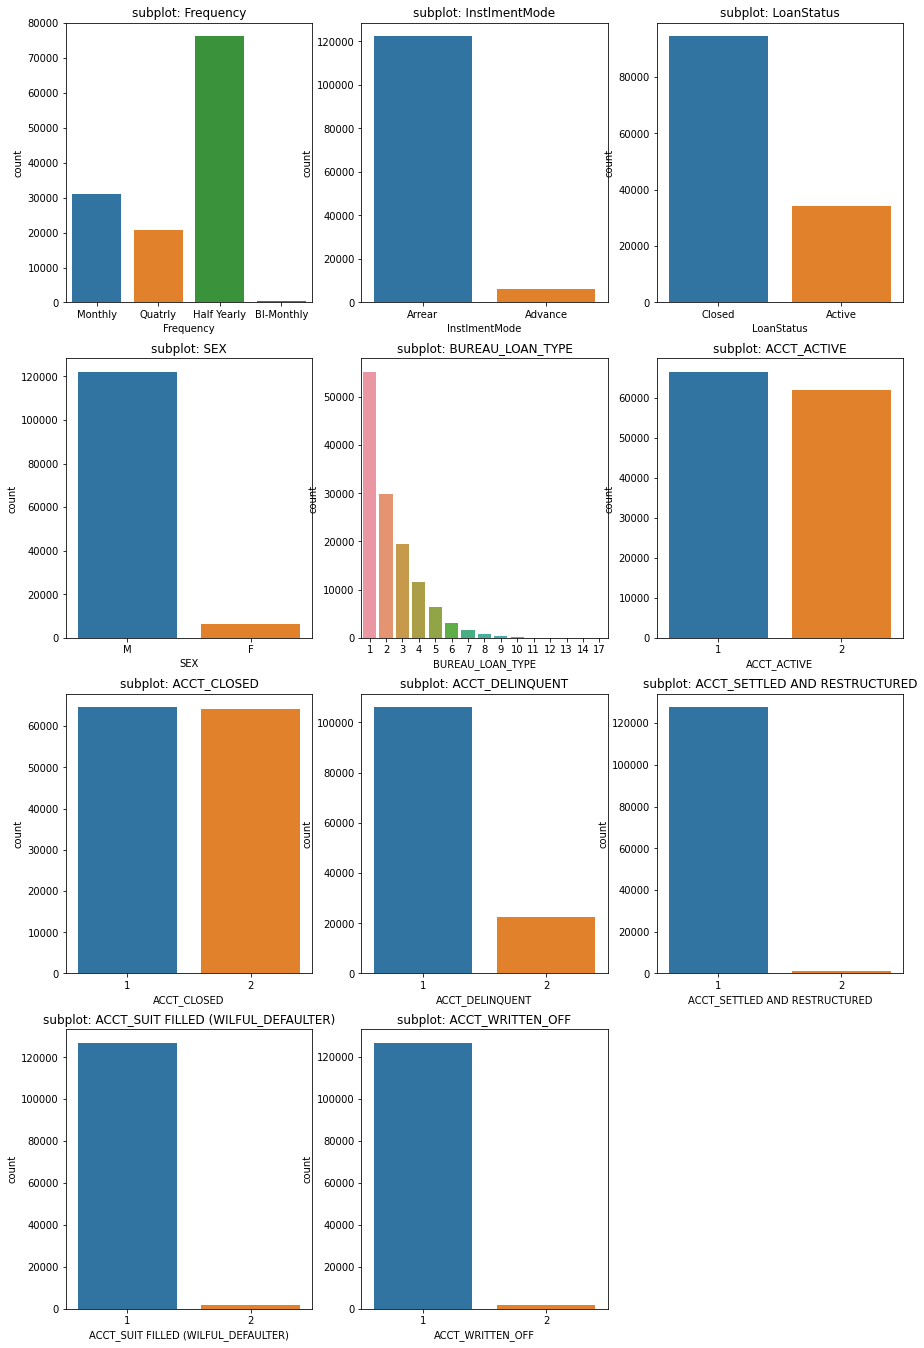

In [90]:
nomial_col = ['Frequency', 'InstlmentMode', 'LoanStatus', 'SEX', 'BUREAU_LOAN_TYPE', 'ACCT_ACTIVE', 'ACCT_CLOSED'
              ,'ACCT_DELINQUENT', 'ACCT_SETTLED AND RESTRUCTURED', 'ACCT_SUIT FILLED (WILFUL_DEFAULTER)', 'ACCT_WRITTEN_OFF']

#  Categorical Data
a = 6  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,36))

for i in nomial_col:
    plt.subplot(a, b, c)
    plt.title('subplot: {}'.format(i))
    plt.xlabel(i)
#     plt.xticks(rotation=60)
    sns.countplot(new_train[i])
    c = c + 1

plt.show()

# for i in nomial_col:
#     plt.subplots()
#     (ind_var[i].value_counts(normalize=True, dropna = False)*100).plot.bar(figsize = (8,4), title = ind_var[i].name)
#     plt.xticks(rotation=90)
#     plt.ylabel("percentage")
#     plt.show()

**iNSIGHTS -**

- in **Frequency** -
    - their are **approx. 59%** loan installments are **Half-yearly** frequency.
    - **Bi-Monthly** loan installments are **less than 1%** and these are **LOWEST**.
    
    
- in **InstlmentMode** -
    - **around 95%** loans are classified as **Arrear**
        - Here, we can have Low chances to get Top-Up Loans.
    - **around 5%** loans are classified as **Advance**.
        - Here, we can have High chances to get Top-Up Loans.
        
        
- in **LoanStatus** -
    - **upto 75%** loans are registered as **Closed**
    - **around 25%** loans are **Active** and having great change to have Top-Up Loans.
    


- in **SEX** -
    - **around 95%** borrowers were **Male** while **upto 5%** are **Females**
    - it contains some missing values.


- in **BUREAU_LOAN_TYPE** -
    - it is an **Loan Account Type** which is assigned by the financial institute to the borrower with particulare **Loan Type**.
    - Borrowers having only **1** Loan Account Type is higher as compared to other types.
    - We can also see a borrower can **have one or more than one** Loan Account Type also.
    
    
- in **ACCT_ACTIVE** -
    - Borrowers with **ONE** active account is higher than Borrowers having **Two**.
    - we assume, the Borrowers having 1 active Loan account are having higher chances to have Top-up Loan facility.
    
    
- in **ACCT_CLOSED** -
    - Both bar are looks similar. So both will have same same chances to have Top-UP Loan.
    
    
- in **ACCY_DELINQUENT** -
    - Borrowers who failed to pay their installment on or before give "**DUE DATE**"
    - **1** delinquent borrower counts are higher than **1** delinquent borrower counts are lower
    
    
- in **ACCT_SETTLED AND RESTRUCTURED** and **ACCT_SUIT FILED (WILFUL DEFAULTER)** -
    - both the count plots are giving similar information as well as they looks alike each others.

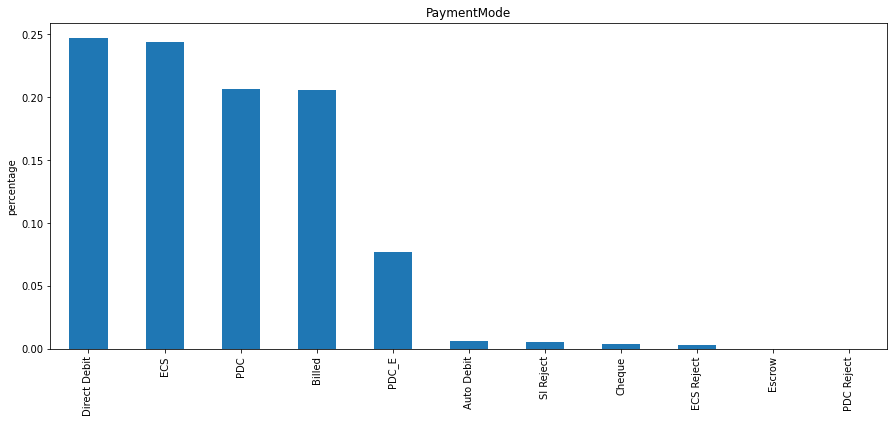

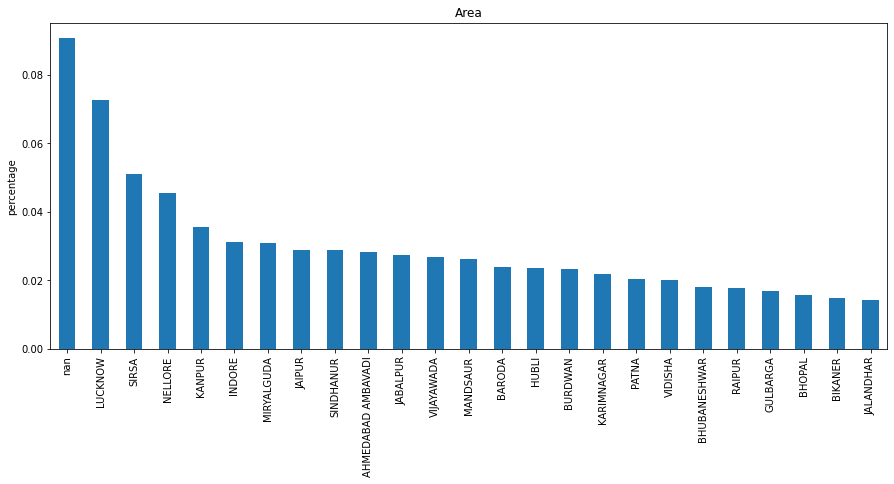

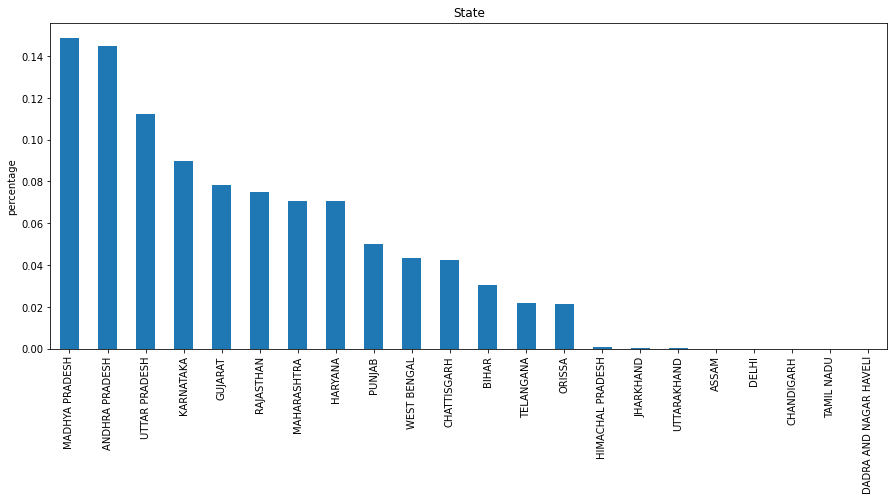

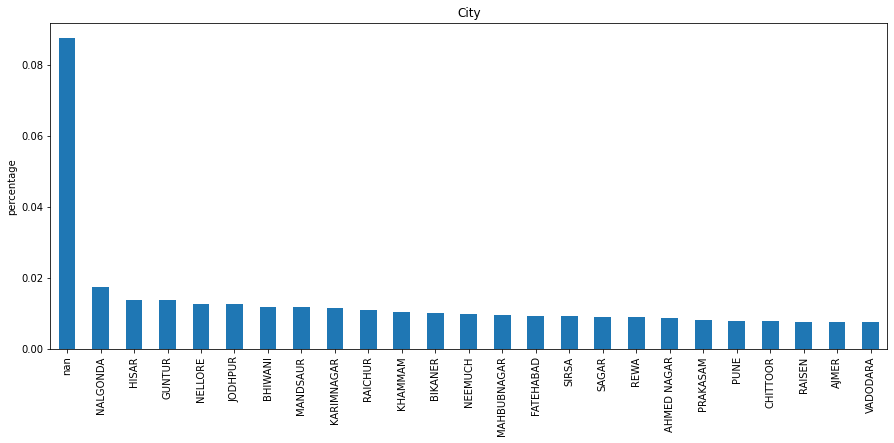

In [91]:
cat_var = ['PaymentMode', 'Area', 'State', 'City']

for i in cat_var:
    ind_var[i].value_counts(normalize=True, dropna=False).head(25).plot.bar(figsize = (15, 6), title = ind_var[i].name)
    plt.xticks(rotation=90)
    plt.ylabel("percentage")
    plt.show()

**iNSIGHTS -**

1. **PaymentMode** -
    - Installment payments are highly accepted by **Direct Debit**, **ECS**, **PDC**, **Billed** respectively. These modes consists **upto 90%**. 
    - [to understand more about payment mode refer - https://www.creditmantri.com/article-how-to-change-mode-of-repayment-for-a-loan/]


2. **Area** -
    - contains **upto 9%** are missing values.
    - **Lucknow** Area's having **around 7.50%** borrowers.


3. **State** -
    - **Madhya Pradesh** and **Andhra Pradesh** are having highest borrowers as compared to other states.
    
    
4. **City** -
    - it contains **upto 9%** missing values

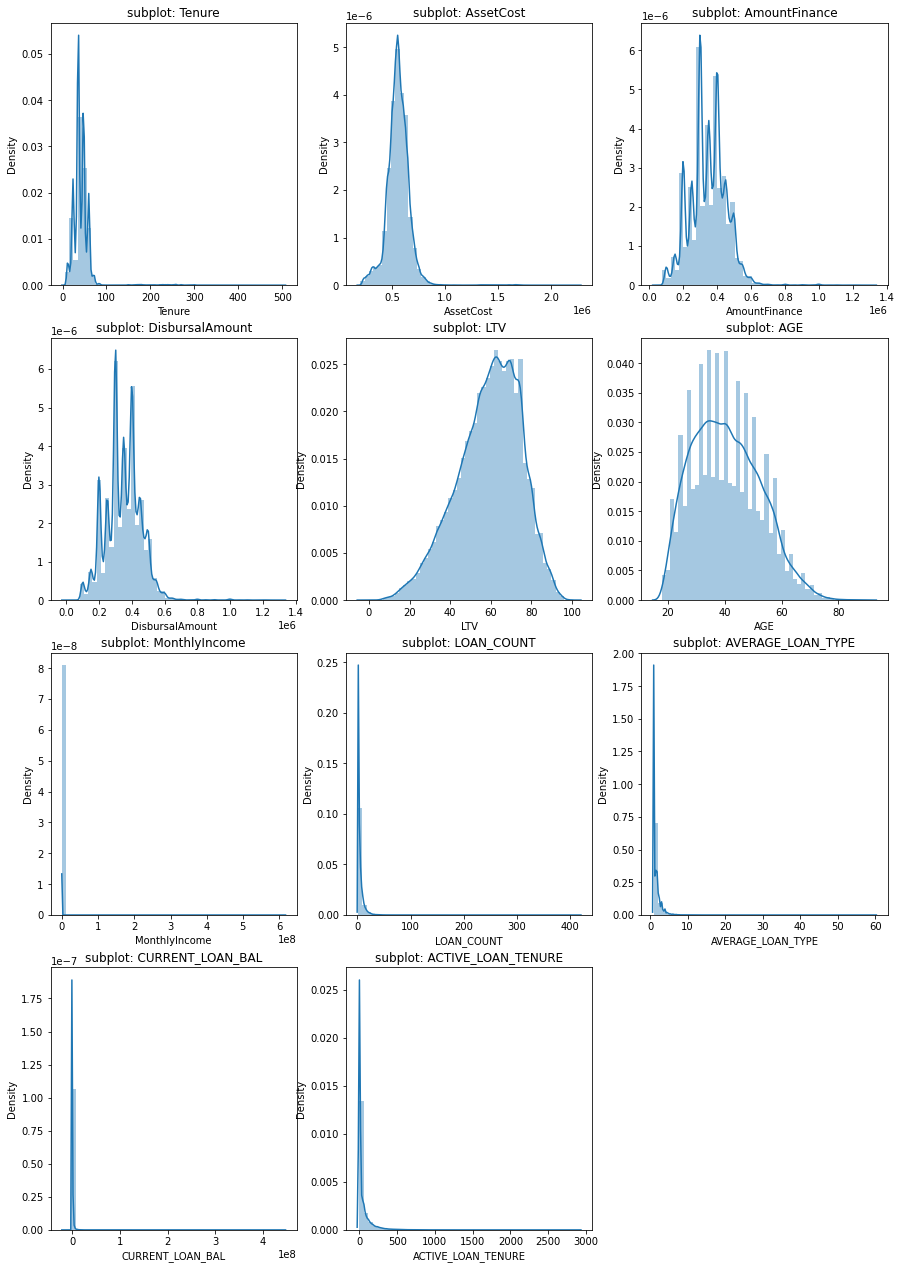

In [79]:
num_col = ['Tenure', 'AssetCost', 'AmountFinance','DisbursalAmount','LTV','AGE','MonthlyIncome'
           ,'LOAN_COUNT', 'AVERAGE_LOAN_TYPE', 'CURRENT_LOAN_BAL', 'ACTIVE_LOAN_TENURE']

#  Categorical Data
a = 5  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,28))

for i in num_col:
    plt.subplot(a, b, c)
    plt.title('subplot: {}'.format(i))
    plt.xlabel(i)
    sns.distplot(new_train[i])
    c = c + 1

plt.show()

- **iNSIGHTS** -
    - Data is not **Normaly Distributed**.
    - In **Tenure**, **AmountFinance** and **DisbursalAmount** the densityplot is showing very **high zig-zac** distrubution.
    - In **MonthlyIncome**, **Loan_Count**, **Average_Loan_Type**, **Current_Loan_Bal** and **Active_Loan_Tenure**, these features density plot is skewed and showing either one tower or slitly moving towards right.

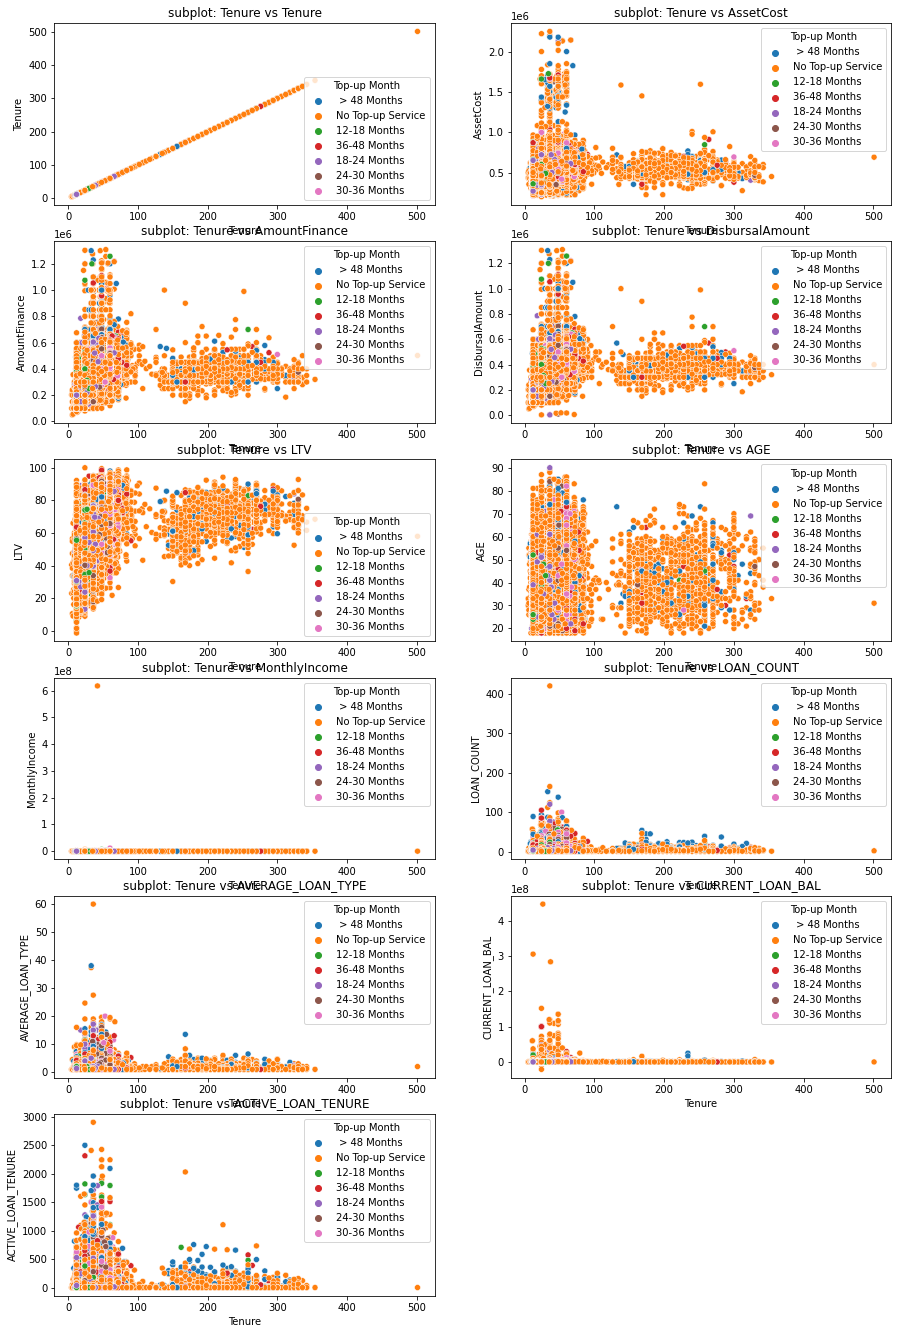

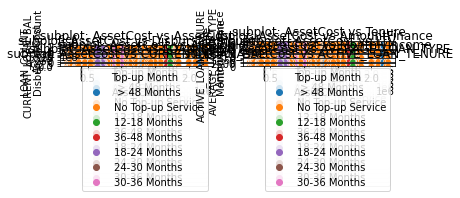

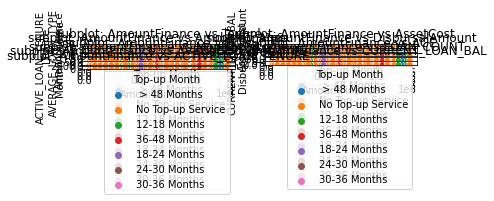

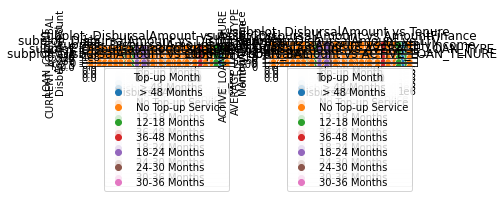

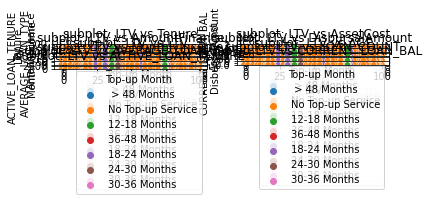

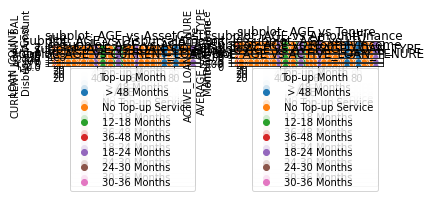

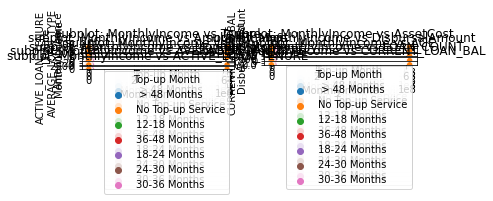

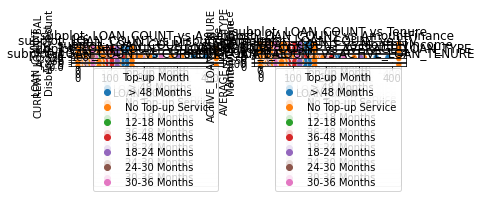

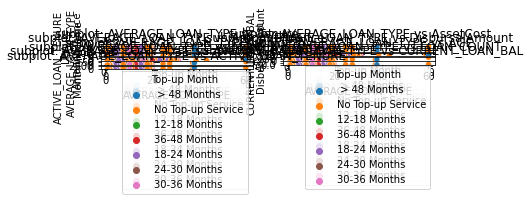

ValueError: num must be 1 <= num <= 100, not 101

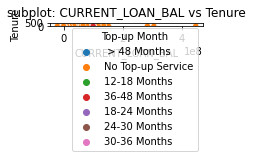

In [103]:
num_col = ['Tenure', 'AssetCost', 'AmountFinance','DisbursalAmount','LTV','AGE','MonthlyIncome'
           ,'LOAN_COUNT', 'AVERAGE_LOAN_TYPE', 'CURRENT_LOAN_BAL', 'ACTIVE_LOAN_TENURE']

#  Categorical Data
a = 50  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,200))

for i in num_col:
    for j in num_col:
        plt.subplot(a, b, c)
        plt.title('subplot: {} vs {}'.format(i, j))
        plt.xlabel(i)
        plt.ylabel(j)
        sns.scatterplot(new_train[i], new_train[j], hue = target_var)
        c = c + 1
    plt.show()

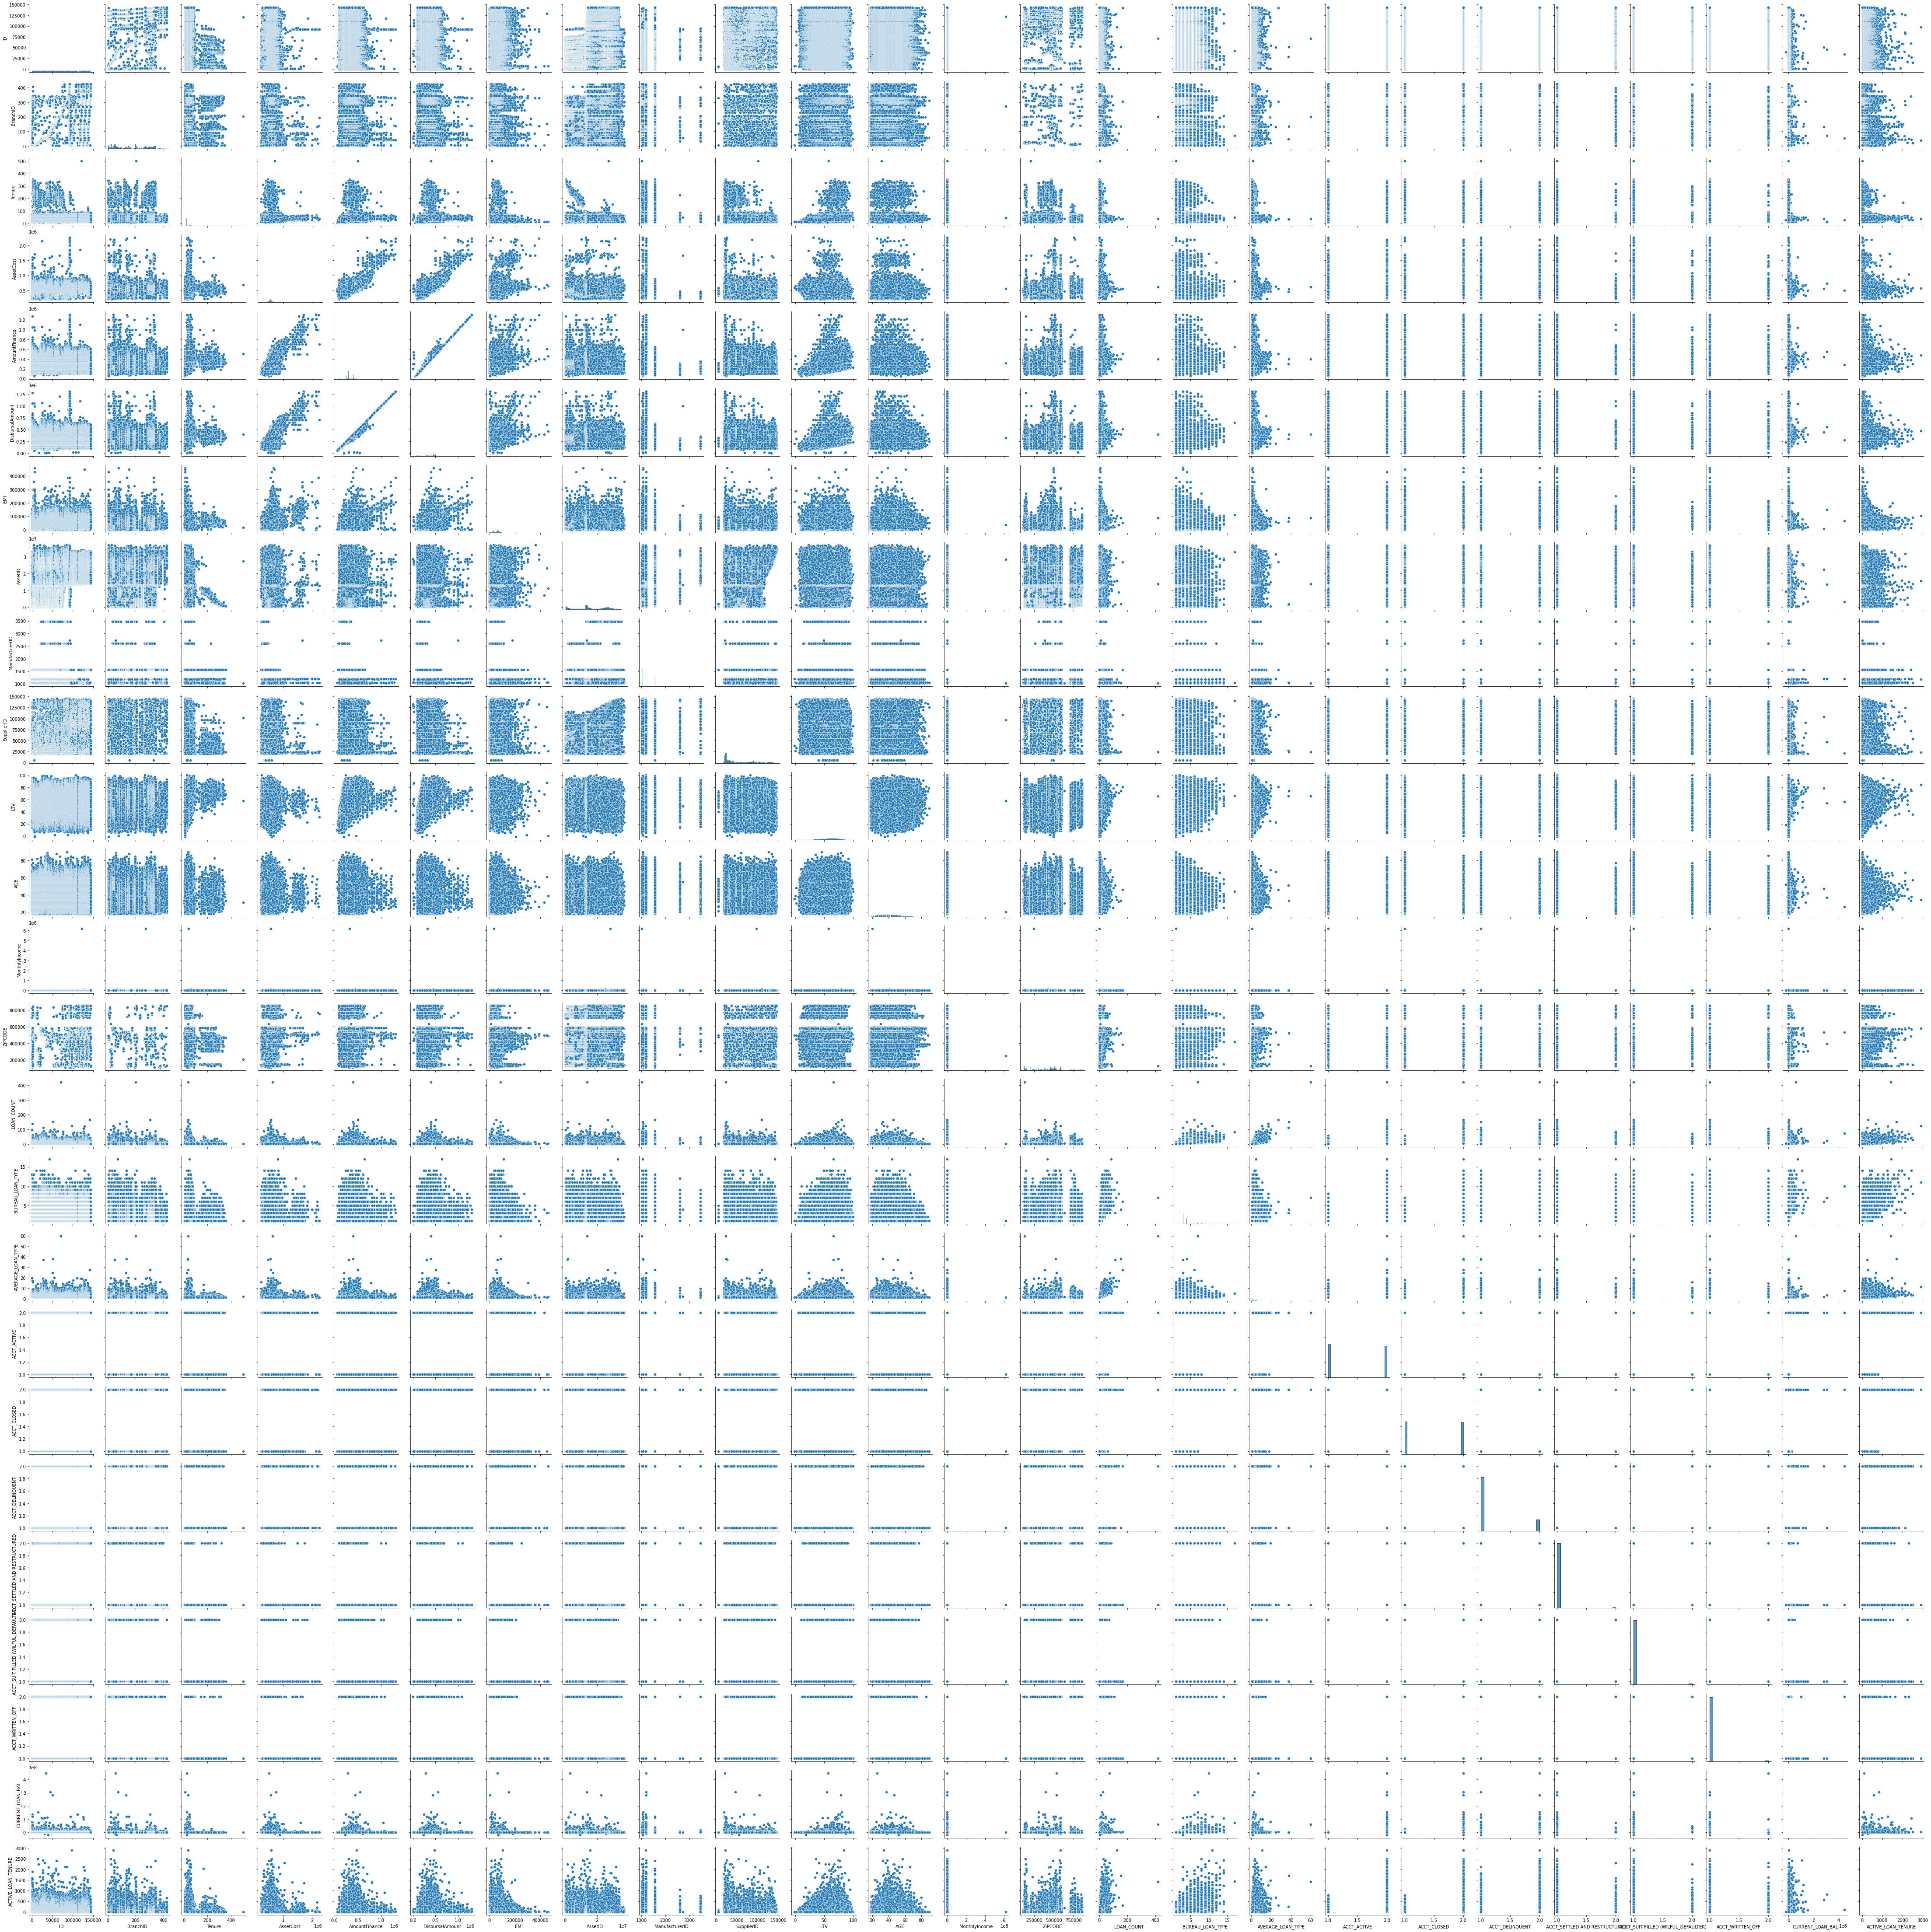

In [104]:
sns.pairplot(new_train)

## Data Cleaning

In [137]:
# Creating Copy of train data as well as test data
train = new_train.copy()
test = new_test.copy()

In [138]:
test

ID    Frequency InstlmentMode LoanStatus PaymentMode  BranchID  \
0           4      Monthly       Advance     Closed       PDC_E         2   
1           5      Monthly       Advance     Closed         PDC         2   
2           6      Quatrly        Arrear     Closed         PDC         2   
3          25  Half Yearly        Arrear     Closed      Billed       154   
4         119      Quatrly        Arrear     Closed         PDC       194   
...       ...          ...           ...        ...         ...       ...   
14740  143396      Monthly        Arrear     Closed         PDC       143   
14741  143397      Monthly        Arrear     Closed         PDC        32   
14742  143398      Monthly        Arrear     Closed         PDC        32   
14743  143399      Monthly        Arrear     Closed       PDC_E       246   
14744  143400      Monthly        Arrear     Closed       PDC_E       246   

                             Area  Tenure  AssetCost  AmountFinance  ...  \
0                            GUNA      46     480000       365000.0  ...   
1                            GUNA      45     480000       285000.0  ...   
2                            GUNA      48     580000       400000.0  ...   
3                             NaN      36     725000       500000.0  ...   
4                         CUTTACK      48     617000       400000.0  ...   
...                           ...     ...        ...            ...  ...   
14740  NEW DELHI BARAKHAMBHA ROAD      35     530016       419616.0  ...   
14741           BANGALORE LALBAGH      36     595000       446500.0  ...   
14742           BANGALORE LALBAGH      36     595000       446500.0  ...   
14743                     BIKANER      12     400000       280000.0  ...   
14744                     BIKANER      12     400000       280000.0  ...   

       BUREAU_LOAN_TYPE  AVERAGE_LOAN_TYPE ACCT_ACTIVE ACCT_CLOSED  \
0                     4                1.0           2           2   
1                     5                1.6           2           2   
2                     4                3.0           2           2   
3                     2                1.0           2           2   
4                     2                1.0           2           2   
...                 ...                ...         ...         ...   
14740                 6                6.5           2           2   
14741                 4                1.5           2           2   
14742                 4                1.5           2           2   
14743                 4                4.0           2           2   
14744                 4                4.0           2           2   

      ACCT_DELINQUENT  ACCT_SETTLED AND RESTRUCTURED  \
0                   1                              1   
1                   1                              1   
2                   1                              1   
3                   1                              1   
4                   1                              1   
...               ...                            ...   
14740               1                              1   
14741               1                              1   
14742               1                              1   
14743               1                              1   
14744               1                              1   

       ACCT_SUIT FILLED (WILFUL_DEFAULTER)  ACCT_WRITTEN_OFF  \
0                                        1                 1   
1                                        1                 1   
2                                        1                 1   
3                                        1                 1   
4                                        1                 1   
...                                    ...               ...   
14740                                    1                 1   
14741                                    1                 1   
14742                                    1                 1   
14743              

In [ ]:
# Getting months of loan
# from datetime import datetime
# from dateutil import relativedelta
# d1 = df1['DisbursalDate']
# d2 = df1['MaturityDAte']
# def get_months(d1, d2):
#     date1 = datetime.strptime(str(d1), '%Y-%m-%d')
#     date2 = datetime.strptime(str(d2), '%Y-%m-%d')
#     print (date2, date1)
#     r = relativedelta.relativedelta(date2, date1)
#     months = r.months +  12 * r.years
#     if r.days > 0:
#         months += 1
#     print (months)
#     return  months


# end_date = df1['MaturityDAte']
# start_date = d1 = df1['DisbursalDate']
# num_months = (end_date.year - start_date.year) * 12 + (end_date.month - start_date.month)

# from datetime import datetime
# def diff_month(d1, d2):
#     return (df1['MaturityDAte'] - df1['DisbursalDate'])*12 + d1.month -d2.month

# df1['Loan_term'] = diff_month(df1['MaturityDAte'], df1['DisbursalDate'])
# df1["Loan_term"]


# train['loanDuration'] = ((train['MaturityDAte'] - train['DisbursalDate'])/np.timedelta64(1, 'M'))
# train['loanDuration'] = train['loanDuration'].astype(int)
# print("Loan Duration - ") 
# print("*" * 50)
# print(train['loanDuration'].unique())

# test['loanDuration'] = ((test['MaturityDAte'] - test['DisbursalDate'])/np.timedelta64(1, 'M'))
# test['loanDuration'] = test['loanDuration'].astype(int) + 1
# test['loanDuration'].unique()

#### Imputing Missing Values

In [119]:
# Checking Missing value in sex feature

sex_missing = (train_demo['SEX'].isnull().sum())
print("Total Missing in SEX feature - ", sex_missing)

train['SEX'].fillna(method = 'ffill', inplace = True)
print("Total Missing after imputation - ", train['SEX'].isnull().sum())


Total Missing in SEX feature -  59
Total Missing after imputation -  0


In [128]:
# Age missing value imputation

age_missing = (train['AGE'].isnull().sum())
print("Total Missing in age - ", age_missing)

# Displaying Mean & Median of age
print("Age Mean - ", train.AGE.mean())
print("Age Median - ", train.AGE.median())

train['AGE'].fillna(train['AGE'].median(), inplace = True)
print("Meadian imputed in AGE column...")
print("Missing value after imputation - ", train.AGE.isnull().sum())

Total Missing in age -  59
Age Mean -  40.66480294876979
Age Median -  40.0
Meadian imputed in AGE column...
Missing value after imputation -  0


In [123]:
# Imputing Missings in Monthly Income -

print("Missing Values in Monthly Income feature - ", train.MonthlyIncome.isnull().sum())
print("Mean - ", train.MonthlyIncome.mean())
print("Median - ", train.MonthlyIncome.median())

# filling missing with median
train.MonthlyIncome.fillna(train.MonthlyIncome.median(), inplace = True)
print("Missing filled.....")
print("Checking Missing after fill - ", train.MonthlyIncome.isnull().sum())

Missing Values in Monthly Income feature -  234
Mean -  50323.60434087883
Median -  35833.33
Missing filled.....
Checking Missing after fill -  0


In [124]:
# Imputing Missing values in ZIPCODE
# df1.loc[df1.ZiPCODE.isnull()]
zip_missing = train.ZiPCODE.isnull().sum()
print("Missing Values in Zipcode - ", zip_missing)

# filling missing value by 'ffill'
train.ZiPCODE.fillna(method = 'ffill', inplace = True)
print("Missing after filling : ", train.ZiPCODE.isnull().sum())

Missing Values in Zipcode -  372
Missing after filling :  0


In [125]:
# Checking missing In maturity
print('Missing in Maturity Date - ', train.MaturityDAte.isnull().sum())

# filling by 'ffill'
train.MaturityDAte.fillna(method = 'ffill', inplace = True)
print("Missing after fill - ", train.MaturityDAte.isnull().sum())

Missing in Maturity Date -  1
Missing after fill -  0


In [129]:
train.isnull().sum()

ID                                         0
Frequency                                  0
InstlmentMode                              0
LoanStatus                                 0
PaymentMode                                0
BranchID                                   0
Area                                   11653
Tenure                                     0
AssetCost                                  0
AmountFinance                              0
DisbursalAmount                            0
EMI                                        0
DisbursalDate                              0
MaturityDAte                               0
AuthDate                                   0
AssetID                                    0
ManufacturerID                             0
SupplierID                                 0
LTV                                        0
SEX                                        0
AGE                                        0
MonthlyIncome                              0
City      

In [141]:
test.isnull().sum()

ID                                       0
Frequency                                0
InstlmentMode                            0
LoanStatus                               0
PaymentMode                              0
BranchID                                 0
Area                                   546
Tenure                                   0
AssetCost                                0
AmountFinance                            0
DisbursalAmount                          0
EMI                                      0
DisbursalDate                            0
MaturityDAte                             0
AuthDate                                 0
AssetID                                  0
ManufacturerID                           2
SupplierID                               0
LTV                                      0
SEX                                      5
AGE                                      7
MonthlyIncome                           14
City                                     0
State      

In [142]:
# Filling Missing values in Test set

test['SEX'].fillna(method = 'ffill', inplace = True)
test['AGE'].fillna(train['AGE'].median(), inplace = True)
test.MonthlyIncome.fillna(train.MonthlyIncome.median(), inplace = True)
test.ZiPCODE.fillna(method = 'ffill', inplace = True)
test.ManufacturerID.fillna(method = 'ffill', inplace = True)

In [132]:
test.isnull().sum()

ID                                     0
Frequency                              0
InstlmentMode                          0
LoanStatus                             0
PaymentMode                            0
BranchID                               0
Area                                   0
Tenure                                 0
AssetCost                              0
AmountFinance                          0
DisbursalAmount                        0
EMI                                    0
DisbursalDate                          0
MaturityDAte                           0
AuthDate                               0
AssetID                                0
ManufacturerID                         0
SupplierID                             0
LTV                                    0
SEX                                    0
AGE                                    0
MonthlyIncome                          0
City                                   0
State                                  0
ZiPCODE         

In [143]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14745 entries, 0 to 14744
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   14745 non-null  int64  
 1   Frequency                            14745 non-null  object 
 2   InstlmentMode                        14745 non-null  object 
 3   LoanStatus                           14745 non-null  object 
 4   PaymentMode                          14745 non-null  object 
 5   BranchID                             14745 non-null  int64  
 6   Area                                 14199 non-null  object 
 7   Tenure                               14745 non-null  int64  
 8   AssetCost                            14745 non-null  int64  
 9   AmountFinance                        14745 non-null  float64
 10  DisbursalAmount                      14745 non-null  float64
 11  EMI                         

In [133]:
# Converting Age feature from float to int
train['AGE'] = train['AGE'].astype(int)
test['AGE'] = test['AGE'].astype(int)

# Converting DisbursalAmount dtype to int
train["DisbursalAmount"] = train["DisbursalAmount"].astype('float32')
test["DisbursalAmount"] = test['DisbursalAmount'].astype('float32')

# Converting ManufacturerID dtype to int
test['ManufacturerID'] = test['ManufacturerID'].astype(int)

In [134]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128655 entries, 0 to 128654
Data columns (total 37 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ID                                   128655 non-null  int64  
 1   Frequency                            128655 non-null  object 
 2   InstlmentMode                        128655 non-null  object 
 3   LoanStatus                           128655 non-null  object 
 4   PaymentMode                          128655 non-null  object 
 5   BranchID                             128655 non-null  int64  
 6   Area                                 117002 non-null  object 
 7   Tenure                               128655 non-null  int64  
 8   AssetCost                            128655 non-null  int64  
 9   AmountFinance                        128655 non-null  float64
 10  DisbursalAmount                      128655 non-null  float32
 11  EMI          

In [136]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 53385 to 53396
Data columns (total 37 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   12 non-null     int64  
 1   Frequency                            12 non-null     object 
 2   InstlmentMode                        12 non-null     object 
 3   LoanStatus                           12 non-null     object 
 4   PaymentMode                          12 non-null     object 
 5   BranchID                             12 non-null     int64  
 6   Area                                 12 non-null     object 
 7   Tenure                               12 non-null     int64  
 8   AssetCost                            12 non-null     int64  
 9   AmountFinance                        12 non-null     float64
 10  DisbursalAmount                      12 non-null     float32
 11  EMI                        

### Creating CSV file

In [144]:
train.to_csv('train.csv', sep=',', index=False)
test.to_csv('test.csv', sep=',', index=False)

In [ ]:
# # Creating Dummies variable Trap for X set
# X_enc = pd.get_dummies(X, drop_first=True)
# X_enc.shape

# Appliying Label Encoder to target data (y) : 

# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder().fit(y)
# y = label_encoder.transform(y)

In [ ]:
# from sklearn.model_selection import train_test_split


#### Correlation

In [ ]:
# plt.subplots(figsize=(15,15))
sns.heatmap(df1.corr(method = 'pearson'), annot = True)

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.4)
len(set(corr_features))

In [ ]:
corr_features

## Model Building

In [ ]:
# Import Libraries for modeling

from pandas import set_option
# from pandas.tools.plotting import scatter_matrix

# from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f_score
# from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

from xgboost import XGBClassifier

#### Initial Model to fit on data

In [ ]:
# def BaseModel():
#     baseModels = []
#     baseModels.append(('LogReg', LogisticRegression()))
#     baseModels.append(('KNN', KNeighborsClassifier()))
#     baseModels.append(('DTree', DecisionTreeClassifier()))
#     baseModels.append(('Gauss_NB', GaussianNB()))
#     baseModels.append(('SVM', SVC(probability = True)))
#     baseModels.append(('Ada_Boost', AdaBoostClassifier()))
#     baseModels.append(('GBoost', GradientBoostingClassifier()))
#     baseModels.append(('RForest', RandomForestClassifier()))
#     baseModels.append(('XtraTree', ExtraTreesClassifier()))
#     baseModels.append(('XGB', XGBClassifier()))
#     return baseModels

In [ ]:
# def baseLine2(X_train, y_train, models):
#     num_folds = 5
#     scoring = 'f1_macro'
    
#     results = []
#     names = []
#     for name, model in models:
#         kfold = StratifiedKFold(n_splits = num_folds)
#         cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = scoring)
#         results.append(cv_results)
#         names.append(name)
#         msg = "%s : %f (%f)" %(name, cv_results.mean(), cv_results.std())
#         print(msg)
    
#     return names, results

In [ ]:
# models = BaseModel()
# names, results = baseLine2(X_train, y_train, models)